# TAREA 13
## EJERCICIO 1
Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

### SOLUCIÓN

In [2]:
Pkg.add("PyPlot"); #Tuve que instalar de nuevo porque tenía problemas con Julia 0.6, así que estoy utilizando Julia 0.5.2
Pkg.add("SymPy");

INFO: Nothing to be done
INFO: Nothing to be done


In [3]:
using PyPlot
using SymPy

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PyPlot.ji for module PyPlot.
INFO: Precompiling module SymPy.


### Método de Euler

In [38]:
#Se implementa el método de Euler tal cual como en las notas de la clase:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [39]:
#Definimos la función:
g(x,t)=[x[2],-1*x[1]-1*x[2]]

g (generic function with 1 method)

In [44]:
list=0:0.01:50; #Graficamos de [0,50] h = 0.01
vec1=euler(g,list,[1,0]); #Guardamos las soluciones y damos las condicones iniciales 

In [45]:
#Se enlistan las soluciones de Euler para graficarlas
list1euler=map(x->x[1],vec1);
list2euler=map(x->x[2],vec1);

__Gráfica de espacio de fase de Euler__ 

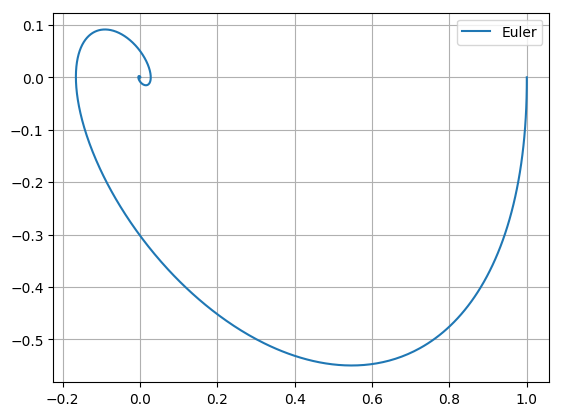

In [132]:
grid("on")
plot(list1euler,list2euler, label="Euler");
legend();

### Método de Runge Kutta

In [47]:
#Se implementa el método de Runge Kutta tal cual como se vio en clase:
function rungeKutta(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end

rungeKutta (generic function with 1 method)

In [49]:
list=0:0.01:50; #Graficamos de [0,50] h = 0.01
vec2=rungeKutta(g,list,[1,0]); #Guardamos las soluciones y damos las condicones iniciales 

In [135]:
#Se enlistan las soluciones de Runge Kutta para graficarlas
list3runge=map(x->x[1],vec2);
list4runge=map(x->x[2],vec2);

__Gráfica de espacio de Runge Kutta__ 

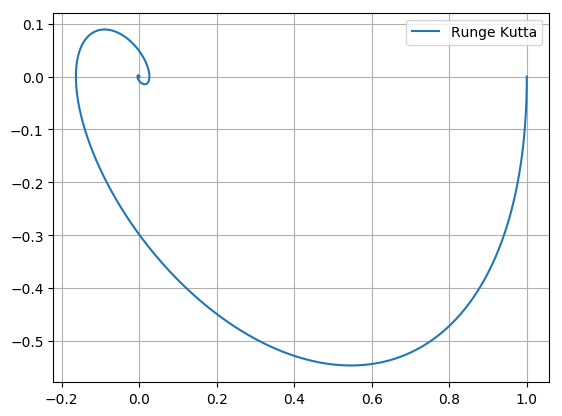

In [136]:
grid("on")
plot(list3runge,list4runge, label="Runge Kutta");
legend();

__Gráfica de Euler y Runge Kutta juntos__ 

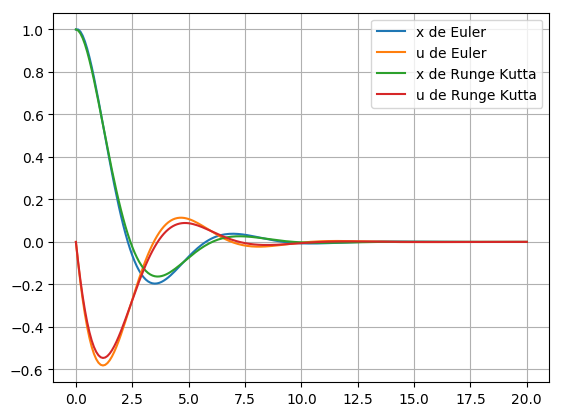

In [36]:
grid("on")
plot(list,list1euler,label="x de Euler");
plot(list,list2euler,label="u de Euler");
plot(list,list3runge,label="x de Runge Kutta");
plot(list,list4runge,label="u de Runge Kutta");
legend();

## EJERCICIO 2
Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

### SOLUCIÓN

In [52]:
#Definimos la función que vamos a resolver, con l=g=1
q(x,t)=[x[2],-sin(x[1])];

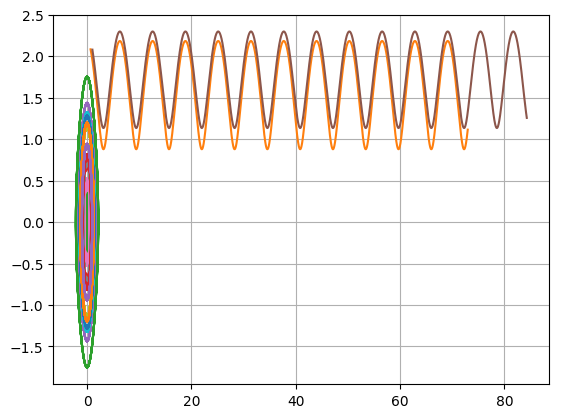

In [91]:
#definimos una función para que vaya generando las condiciones aleatorias:
function condiciones(m)
     return m*(2*rand()-1);
end;


#Graficamos las soluciones con Runge Kutta de orden 4 sobre el intervalo [0,50] con h = 0.01

list=0:0.01:50;
for i in 1:15 #Se hacen 15 condiciones iniciales 
    a=condiciones(1.2); #condiciones para theta
    b=condiciones(2.3); #condiciones para derivada de theta
 
    #usamos el método de runge kutta
    vec=rungeKutta(q,list,[a,b]); 
    list3runge=map(x->x[1],vec);
    list4runge=map(x->x[2],vec);
    grid("on")
    plot(list3runge,list4runge)
    end;


## EJERCICIO 3
Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.
### SOLUCIÓN

In [115]:
#Usamos el método de la tarea 12:

function metkutta(g,x0,t0,tf,h) #El método recibe: g=g(x,y),x0 condicion inciial, t0 tiempo                                        inicial,tf tiempo final, h es le tamaño de cada intervalo.
    
    timeArray = linspace(t0, tf, round((tf-t0)/(h)));  #dividmos el intervalo en (tf-ti)/h
    xArray = zeros(length(timeArray)); #creamos un array con el mismo número de entras que y array pero sólo de ceros.
    xArray[1]=x0; #definimos la condición  inicial
    
    for i in 1:length(timeArray)-1 #calculamos los 4 ks:
        k1=g(xArray[i],timeArray[i]);
        k2=g(xArray[i]+(h/2)*k1,timeArray[i]+(h/2));
        k3=g(xArray[i]+(h/2)*k2,timeArray[i]+(h/2));
        k4=g(xArray[i]+h*k3,timeArray[i+1]);
        xArray[i+1] = xArray[i]+(h/6)*(k1+2*k2+2*k3+k4);
    end
    #Se regresan los dos arrays
    return timeArray, xArray; 
end;

In [116]:
#Definimos la función a resolver:
function f(x,t)
    return x*x-1;
end;

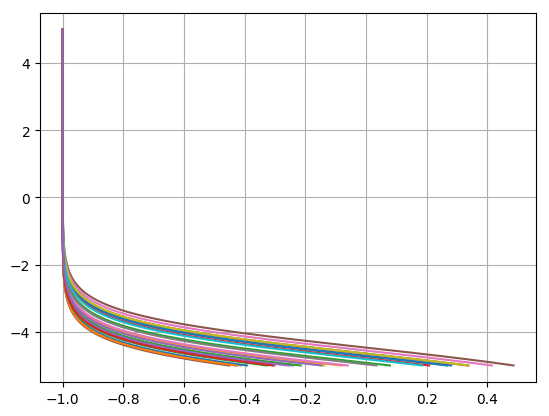

In [119]:
#Graficamos las soluciones:
for i in 1:25 #para 25 condiciones aleatorias
    a = condiciones(0.5);
    (timeArray, xArray)=metkutta(f, a, -5, 5, 0.01); #se usa el intervalo [-5,5]
    grid("on")
    plot(xArray,timeArray);
end;

## EJERCICIO 4
También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.
### SOLUCIÓN


In [121]:
#Definimos la función a resolver:
function p(x,t)
    return x*x;
end;

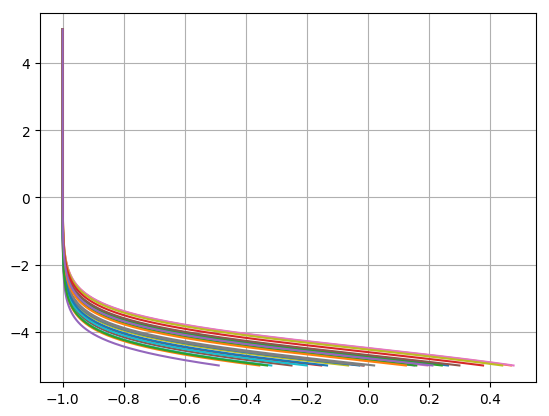

In [123]:
#graficamos las soluciones:

for i in 1:25 #para 25 condiciones aleatorias
    a=condiciones(0.5);
    grid("on")
    (timeArray, xArray) = metkutta(f, a, -5, 5, 0.01); #se usa el intervalo [-5,5]
    plot(xArray,timeArray);
end;